Last week, we learned about the mechanics of two of the most popular clustering algorithms, k-means and DBSCAN.  Before that, we learned how to take a high dimensional data set and project it in to a lower dimensions while maintinaing the total variance in the data with PCA.  Today, we will put all this together with some code.

Let's get started by importing a few libraries:

In [72]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

## K-means

We will start off by making gaussian blobs.  That is a fancy way of saying that we will create point sets that are ball shaped that tend to have more points closer to the center of the blob and less as we move further away from the center.  Indeed, the density of the blob is dictated by a Gaussian distribution in which we can specify various parameters of the distribution.

In [57]:
D, labels = make_blobs(n_samples=500, centers=3, cluster_std=.3, random_state=0)

Let's take a look at this data:

In [58]:
D.shape

(500, 2)

Super, so our data is in 2D, so let's take a look at it by ploting the data with the labels defining the color.

Text(0.5, 1.0, '2d clusters')

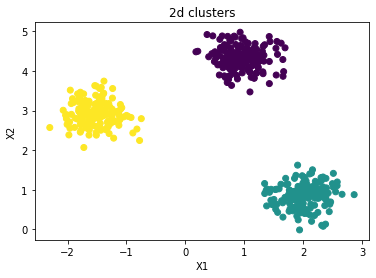

In [59]:
plt.scatter(D[:,0], D[:,1], c=labels)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title('2d clusters')

Last week, we noted that k-means does quite well if our clusters are "ball shaped".  Well, these clusters look pretty ball shaped, let's see how it does!

In [60]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

Great!  Now we have some labels.  Let's take a look at them!

In [61]:
pred_labels[:100]

array([2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 0, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0,
       0, 2, 0, 2, 1, 1, 2, 2, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1,
       2, 0, 1, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1,
       1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 1, 2], dtype=int32)

Note that we have lables 0, 1, and, 2. That makes sense since we said that we set k=3 in k-means.  Let's look at how our points clustered.  First, let's get the centers and then visuzlize using the predicted labels:

In [62]:
centers = kmeans.cluster_centers_
centers

array([[ 2.01785973,  0.84733342],
       [-1.52248823,  2.92339023],
       [ 0.94294453,  4.32521929]])

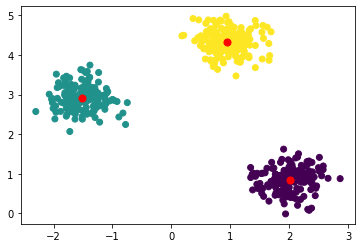

In [63]:
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

Cool!  So that worked pretty well.  The centers look to be in the centers of the clusters and note that while the colors changed, the points that are in each cluster are the same.  For now, we will eyeball (but later in the week, we will learn how to quanity the quality the result).

We spoke last week of the functon that we are trying to minimize with k-means.  

**Question:** *provide in words and with a formuala what the function is*.

Given a clustering, we can compute the value of the function.  sklearn calls it 'inertia'

In [64]:
kmeans.inertia_

85.83064567351518

Note that while we are trying to minimize inertia, we have to be a bit careful with blindly minizing that number.  For example, it seems that we got the "correct" answer with 3 clusters, but what if we try with 4 clusters.  Do you think we can reducde the objective function?

Inertia of kmeans with 3 clusters 85.83064567351518
Inertia of kmeans with 4 clusters 74.44985678646742


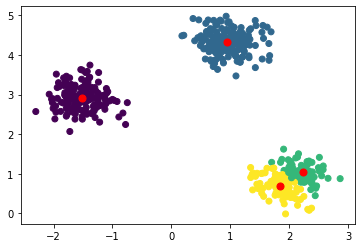

In [65]:
kmeans4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans4.fit_predict(D)

centers = kmeans4.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

print("Inertia of kmeans with 3 clusters", kmeans.inertia_)
print("Inertia of kmeans with 4 clusters", kmeans4.inertia_)

So we reduced the value of the objective function, but, it didn't really give us a "better" clustering.  So, how do we pick a good k?  Well for this example, we generated the data and know what the correct k is, but in general, we don't.  So, one way that in practice that we decide k is called the "elbo method".  We will plot the inertia for various k's and then pick the point when the inertia stops rapidly improving.  So for example

In [66]:
max_clusters = 50
inertias = np.zeros(50)
cluster_range = range(1, max_clusters)
for i in cluster_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, random_state=0)
    kmeans.fit_predict(D)
    inertias[i] = kmeans.inertia_

And then plot the results

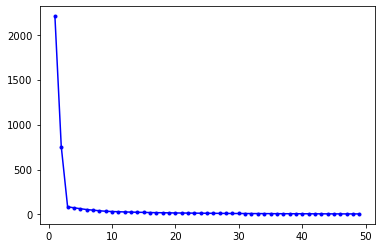

In [67]:
plt.plot(cluster_range, inertias[cluster_range], c='b', marker='.')

So, notice that we see a huge drop in the objective function value from adding clusters until we hit 3.  But after, we are only getting a small improvement.  So, we would pick 3 clusters because it is the smallest number of clusters that we can have before we stop seeing that substaintail improvement.

While this elbow method doesn't have any gurantess, it is, in practice, what people tend to do becuase it works pretty well.

Next, let's play around with the synthetically generated data sets.  First, let's see what happens if we use different standard deviations for our blobs

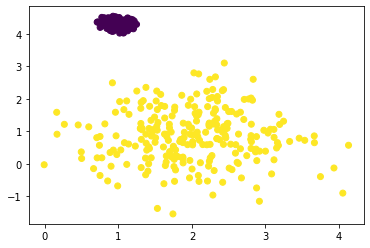

In [68]:
D, labels = make_blobs(n_samples=500, centers=2, cluster_std=[.1, .8], random_state=0)
plt.scatter(D[:,0], D[:,1], c=labels)

and we can still cluster as we did before.

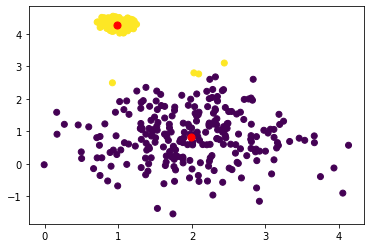

In [69]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

centers = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

But notice that some of the points at the top of the purple cluster are ending up in the wrong cluster!  **Question** Why do you think that is?  

Let's explore this further by creating a lot of overlap between the clusters:

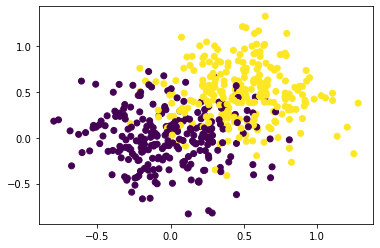

In [70]:
D, labels = make_blobs(n_samples=500, centers=[[0,0], [.5, .5]], cluster_std=.3, random_state=0)
plt.scatter(D[:,0], D[:,1], c=labels)

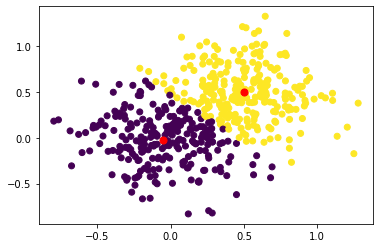

In [71]:
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

centers = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(centers[:,0], centers[:,1], s=50, c='red')

So, what is the takeaway:

1. k-means works well when our clusters are "ball shaped"
1. we can use the elbow method to help us pick a good k
2. if our clusters overlap (i.e. are not well sepearate), we are going to have some problems with points ending in the wrong cluster.

## DBScan

Next, let's play with DBSCAN and the iris data set

In [74]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris_data = load_iris()
D = iris_data['data']
labels = iris_data['target']
n_labels = len(set(labels))
n_labels

3

And let's use DBSCAN

In [95]:
dbs = DBSCAN(eps=.3, min_samples=5)
pred_labels = dbs.fit_predict(D)
pred_labels

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1,
       -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  2,  2, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  2])

So we did get 3 clusters (and the -1 are noise points).  But, recall the lables on the iris dataset:

In [96]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

So that was not so good... In fact, we ended up with a ton of points as noise

In [81]:
sum(pred_labels == -1)

96

And since there are 150 samples in the iris dataset, that means we ended up with 64% of our points as noise.... so not so good.

But, what if we try some different parameters?  Since we have a lot of noise points, that means our neighborhoos are too sparse.  **Question** So, what happens if we fix the number of neighbors but make the size of the neighborhood larger?

In [97]:
dbs = DBSCAN(eps=.5, min_samples=5)
pred_labels = dbs.fit_predict(D)

print("Num clusters", max(pred_labels)+1)
print("Num noise", sum(pred_labels == -1))
print("labels", pred_labels)

Num clusters 2
Num noise 17
labels [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  1  1 -1  1  1  1  1  1  1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


So, we could probe further, but unfortunaly, we cannot make visuzliations like we did for the k-means example since the iris dataset is 4d.  What do we do?

I wasn't sure so I went to the expert ... Prof Barktreuse had an idea!!  We just learned how to project our data to a lower dimension while maintaining a large portion of the total variance.... She suggested we should use PCA to try an capture over 95% of the variance!!

Text(0, 0.5, 'f(r) : fraction of total variance preserved')

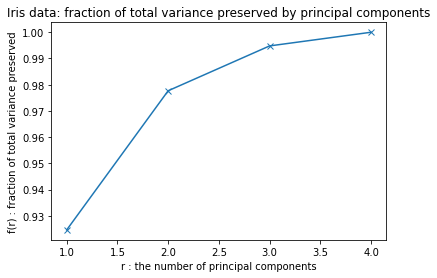

In [110]:
from sklearn.decomposition import PCA
pca = PCA()

D_pca = pca.fit_transform(D)

var_ratio = pca.explained_variance_ratio_
plt.plot(range(1,len(var_ratio)+1), np.cumsum(var_ratio), marker='x')
plt.title('Iris data: fraction of total variance preserved by principal components')
plt.xlabel('r : the number of principal components')
plt.ylabel('f(r) : fraction of total variance preserved')

We can see fro the plot that with even 2 components, we have ~98% of the variance.  So let's use those.  But before we grab those two dimensions, let's review a few ideas. First, let's look at the first two dimensions

Text(0, 0.5, 'X2')

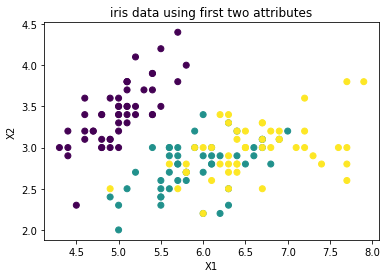

In [111]:
plt.scatter(D[:,0], D[:,1], c=labels)
plt.title('iris data using first two attributes')
plt.xlabel('X1')
plt.ylabel('X2')

Next, let's experiment with the first two components:

Text(0, 0.5, 'PC2')

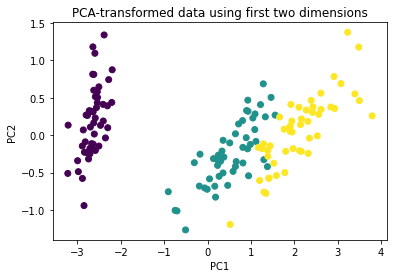

In [115]:
D2_pca = D_pca[:,0:2]
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=labels)
plt.title('PCA-transformed data using first two dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Since we have worked with kmeans a bunch and know there are 3 culsters, let's try that first.

Text(0, 0.5, 'PC2')

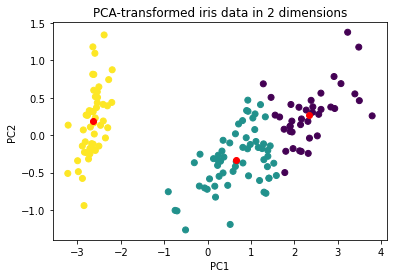

In [116]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D2_pca)

center = kmeans.cluster_centers_
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.scatter(center[:, 0], center[:,1], c='red')
plt.title('PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

So the centers look pretty good, but since the clusters are not "ball shaped" (they are more ellipsoidal, we get some points in the wrong cluster.  Ok, so let's try DBSCAN

Text(0, 0.5, 'PC2')

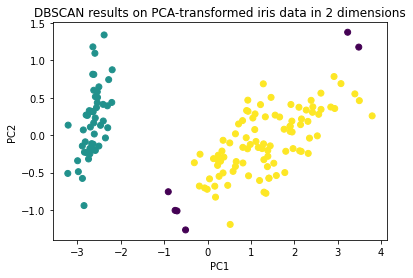

In [120]:
dbs = DBSCAN(eps=0.6, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Okay, so that didn't turn out so well.  Two of our clusters were merged in to one and then we got a bunch of noise points, but we can at lease "see" what happended.  Let's see if we can pick some better params

Text(0, 0.5, 'PC2')

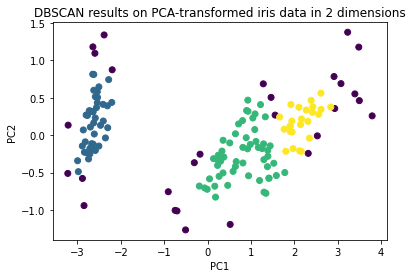

In [136]:
dbs = DBSCAN(eps=0.25, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Okay, that looks a little better, what if we get a little smaller?

Text(0, 0.5, 'PC2')

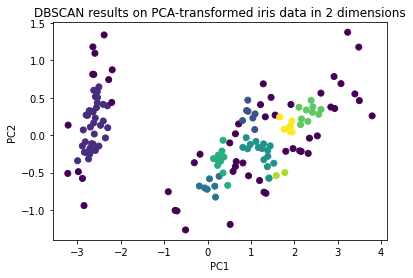

In [138]:
dbs = DBSCAN(eps=0.2, min_samples=5)
pred_labels = dbs.fit_predict(D2_pca)
plt.scatter(D2_pca[:,0], D2_pca[:,1], c=pred_labels)
plt.title('DBSCAN results on PCA-transformed iris data in 2 dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')

Hmmm, well that was maybe a little too small.  But, it turns out, in this representation, the iris data set is not seperable, which means we cannot draw a planer curve that separates the two classes, which means in this rep, we will not be able to do well with DBSCAN.  But, let's try a data set in which we can succeed.

Text(0, 0.5, 'X2')

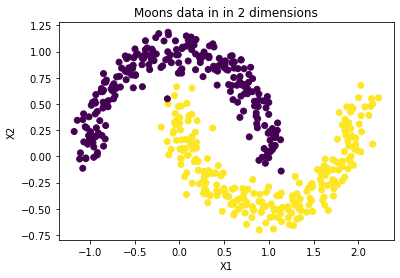

In [142]:
from sklearn.datasets import make_moons
D, labels = make_moons(n_samples=500, noise=.1)
plt.scatter(D[:,0], D[:,1], c=labels)
plt.title('Moons data in in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Great!  Let's see what we get with K-means

Text(0, 0.5, 'X2')

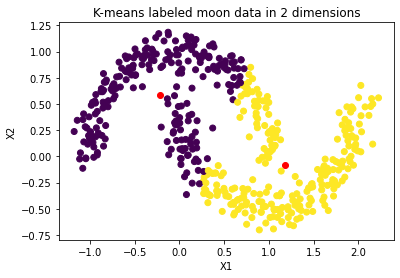

In [146]:
kmeans = KMeans(n_clusters=2, init='random', max_iter=300, random_state=0)
pred_labels = kmeans.fit_predict(D)

center = kmeans.cluster_centers_
plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.scatter(center[:, 0], center[:,1], c='red')
plt.title('K-means labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Well, as we would expect, that was terrible.  Let's try DBSCAN!

Text(0, 0.5, 'X2')

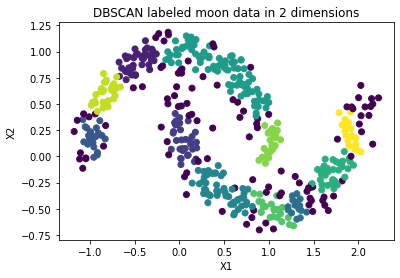

In [156]:
dbs = DBSCAN(eps=.1, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Okay, so eps is too small, let's double eps and see what happens.

Text(0, 0.5, 'X2')

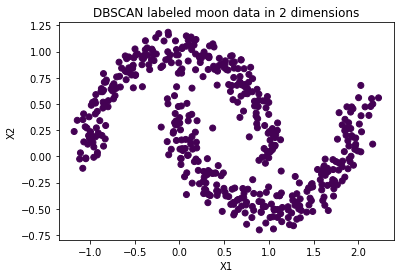

In [157]:
dbs = DBSCAN(eps=.2, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Okay, that was too big.  I was about to give up hope and then Prof Barktreuse spoke up.  She said, you have an upper and lower bound, try to binary search for a good epsilon!  ... okay that sounds good!  Let's try .15

Text(0, 0.5, 'X2')

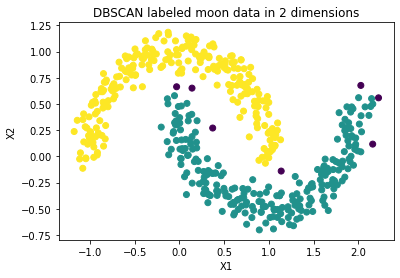

In [158]:
dbs = DBSCAN(eps=.15, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Better!  Let's try a little bigger.

In [165]:
.15 + (.2-.15)/2

0.175

Text(0, 0.5, 'X2')

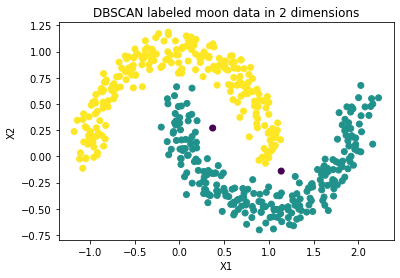

In [166]:
dbs = DBSCAN(eps=.175, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Even better!!  Let's try a little bigger.

In [167]:
.175 + (.2-.175)/2

0.1875

Text(0, 0.5, 'X2')

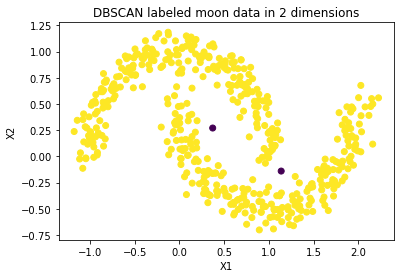

In [168]:
dbs = DBSCAN(eps=.1875, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Seems like we flew too close to the sun.  Let's stick with .175 and ship!

Text(0, 0.5, 'X2')

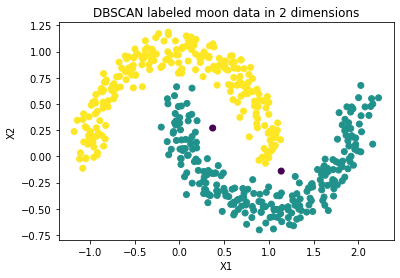

In [169]:
dbs = DBSCAN(eps=.175, min_samples=8)
pred_labels = dbs.fit_predict(D)

plt.scatter(D[:,0], D[:,1], c=pred_labels)
plt.title('DBSCAN labeled moon data in 2 dimensions')
plt.xlabel('X1')
plt.ylabel('X2')

Note that while we binary searched for a good epsilon, there are more direct ways to find good epsilon.  Similar to with k-means, we can look for "elbows" and "knees" in various representatiosn of the data.  For more on finding elbows with DBSCAN (and some packages that can help with that analysis), see [tutorial](https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/)
